In [1]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

Welcome to JupyROOT 6.22/02


Warning in <TClassTable::Add>: class ROOT::VecOps::RVec<int> already in TClassTable
Warning in <TClassTable::Add>: class ROOT::VecOps::RVec<float> already in TClassTable


# Reading the files

In [2]:
folder="${fastMCKalmanOptTesting}/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

resol = folder[folder.index("MC_") + 3: folder.index("smear")]

spread_0 = "(100,-0.01,0.01)"
spread_1 = "(100,-0.01,0.01)"
spread_2 = "(100,-0.01,0.01)"
spread_3 = "(100,-0.01,0.01)"
spread_4 = "(100,-0.4,0.4)"
spread_p = "(100,-0.4,0.4)"

if(resol=="00005"):   
    spread_0 = "(100,-0.01,0.01)"
    spread_1 = "(100,-0.01,0.01)"
    spread_2 = "(100,-0.01,0.01)"
    spread_3 = "(100,-0.01,0.01)"
    spread_4 = "(100,-0.3,0.3)"
    spread_p = "(100,-0.3,0.3)"

if(resol=="01"):   
    spread_0 = "(100,-0.4,0.4)"
    spread_1 = "(100,-0.4,0.4)"
    spread_2 = "(100,-0.2,0.2)"
    spread_3 = "(100,-0.2,0.2)"
    spread_4 = "(150,-0.4,0.4)"
    spread_p = "(150,-0.4,0.4)"

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS.root


# Setting the Aliases

In [3]:
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(tree)
tree.SetAlias("p0MC","part.fParamMC[1].fP[0]")
tree.SetAlias("p0In","part.fParamIn[1].fP[0]")

tree.SetAlias("p1MC","part.fParamMC[1].fP[1]")
tree.SetAlias("p1In","part.fParamIn[1].fP[1]")

tree.SetAlias("p2MC","part.fParamMC[1].fP[2]")
tree.SetAlias("p2In","part.fParamIn[1].fP[2]")

tree.SetAlias("p3MC","part.fParamMC[1].fP[3]")
tree.SetAlias("p3In","part.fParamIn[1].fP[3]")

tree.SetAlias("p4MC","part.fParamMC[1].fP[4]")
tree.SetAlias("p4In","part.fParamIn[1].fP[4]")

tree.SetAlias("pMC","part.fParamMC[1].fData.P()")
tree.SetAlias("pIn","part.fParamIn[1].fData.P()")

tree.SetAlias("Res0MC","(p0In-p0MC)/p0MC")
tree.SetAlias("Res1MC","(p1In-p1MC)/p1MC")
tree.SetAlias("Res2MC","(p2In-p2MC)/p2MC")
tree.SetAlias("Res3MC","(p3In-p3MC)/p3MC")
tree.SetAlias("Res4MC","(p4In-p4MC)/p4MC")
tree.SetAlias("RespMC","(pIn-pMC)/pMC")

tree.SetAlias("sigmaqPt0","sqrt(part.fParamIn[1].fC[14])")
tree.SetAlias("sigmaPtRel0","sigmaqPt0*ptMC")
tree.SetAlias("LArm","getStat(2)")

tree.SetAlias("isOK","part.fStatusMaskIn.fData[1]==31") 
#part.fStatusMaskIn.fData[1]==31



True

In [4]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(treeSeed)
treeSeed.SetAlias("p0MC","input.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("p0Seed","seed.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("c00Seed","sqrt(seed.AliExternalTrackParam.fC[0])")

treeSeed.SetAlias("p1MC","input.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("p1Seed","seed.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("c11Seed","sqrt(seed.AliExternalTrackParam.fC[2])")

treeSeed.SetAlias("p2MC","input.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("p2Seed","seed.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("c22Seed","sqrt(seed.AliExternalTrackParam.fC[5])")

treeSeed.SetAlias("p3MC","input.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("p3Seed","seed.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("c33Seed","sqrt(seed.AliExternalTrackParam.fC[9])")

treeSeed.SetAlias("p4MC","input.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("p4Seed","seed.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("c44Seed","sqrt(seed.AliExternalTrackParam.fC[14])")

treeSeed.SetAlias("c01SeedFull","seed.AliExternalTrackParam.fC[1]")

treeSeed.SetAlias("c02SeedFull","seed.AliExternalTrackParam.fC[3]")
treeSeed.SetAlias("c12SeedFull","seed.AliExternalTrackParam.fC[4]")

treeSeed.SetAlias("c03SeedFull","seed.AliExternalTrackParam.fC[6]")
treeSeed.SetAlias("c13SeedFull","seed.AliExternalTrackParam.fC[7]")
treeSeed.SetAlias("c23SeedFull","seed.AliExternalTrackParam.fC[8]")

treeSeed.SetAlias("c04SeedFull","seed.AliExternalTrackParam.fC[10]")
treeSeed.SetAlias("c14SeedFull","seed.AliExternalTrackParam.fC[11]")
treeSeed.SetAlias("c24SeedFull","seed.AliExternalTrackParam.fC[12]")
treeSeed.SetAlias("c34SeedFull","seed.AliExternalTrackParam.fC[13]")

treeSeed.SetAlias("pMC","input.AliExternalTrackParam.GetP()")
treeSeed.SetAlias("pSeed","seed.AliExternalTrackParam.GetP()")

treeSeed.SetAlias("Res0MC","(p0Seed-p0MC)/p0MC")
treeSeed.SetAlias("Res1MC","(p1Seed-p1MC)/p1MC")
treeSeed.SetAlias("Res2MC","(p2Seed-p2MC)/p2MC")
treeSeed.SetAlias("Res3MC","(p3Seed-p3MC)/p3MC")
treeSeed.SetAlias("Res4MC","(p4Seed-p4MC)/p4MC")
treeSeed.SetAlias("RespMC","(pSeed-pMC)/pMC")


True

# Kalman Residuals

 FCN=208.05 FROM MIGRAD    STATUS=CONVERGED     284 CALLS         285 TOTAL
                     EDM=7.34324e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.95416e+03   9.58377e+01   4.30074e-01  -1.26358e-06
   2  p1          -2.11691e-03   5.85354e-04   3.98359e-06   4.58062e-01
   3  p2           3.51916e-02   6.69776e-04   2.04557e-05   6.06347e-04
   4  p3           3.38602e-01   1.94607e-02   7.39436e-05  -1.68347e-02
   5  p4          -1.08947e-02   4.31164e-03   2.87774e-05  -2.25717e-02
   6  p5           1.55891e-01   5.98506e-03   3.11527e-05  -4.68897e-02


Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Kalman_p0_Resid.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Kalman_p1_Resid.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Kalman_p2_Resid.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalmanOptTesting/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Kalman_p3_Resid.png has been created
Info in <TCanvas::Print>: png file /home/federico/Docume

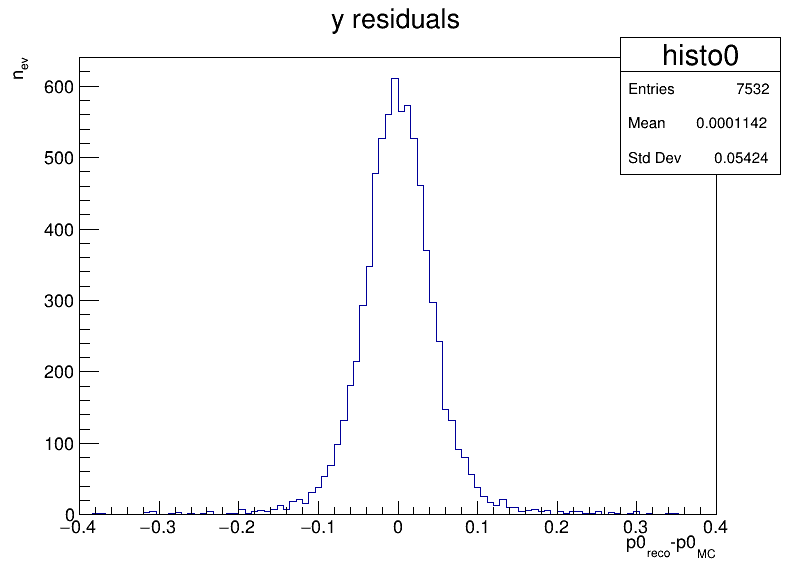

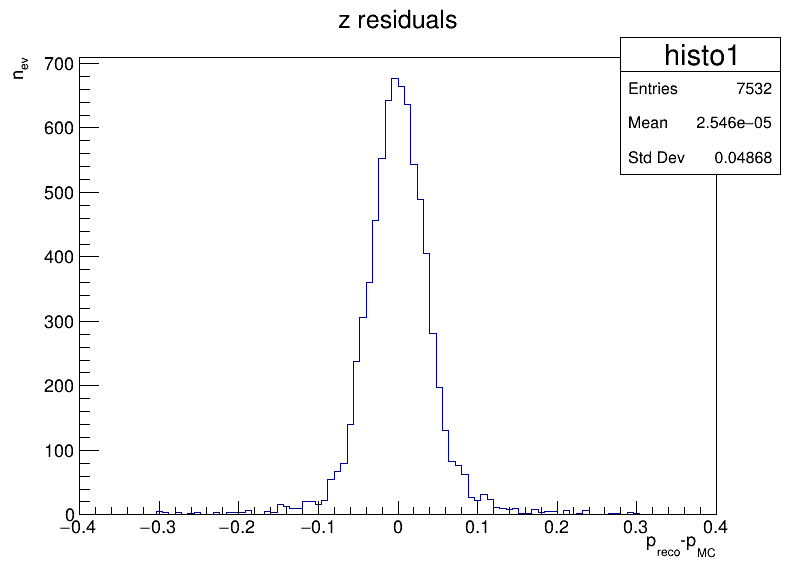

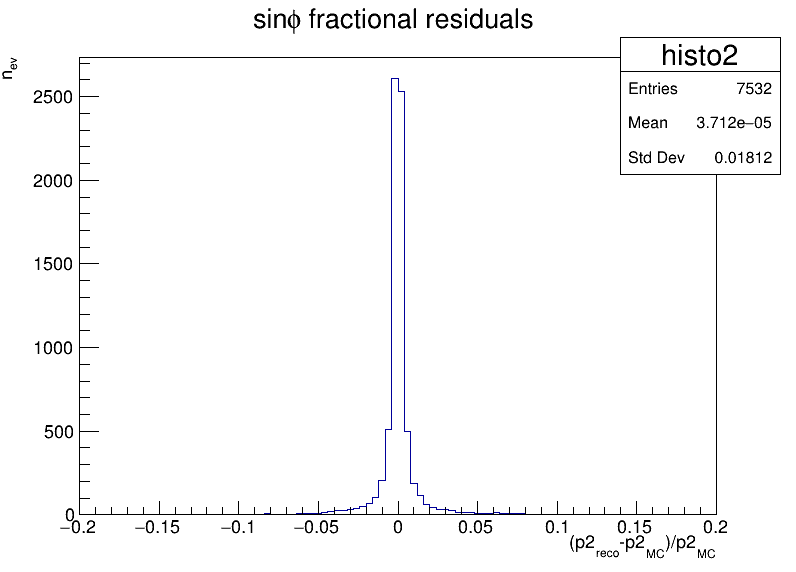

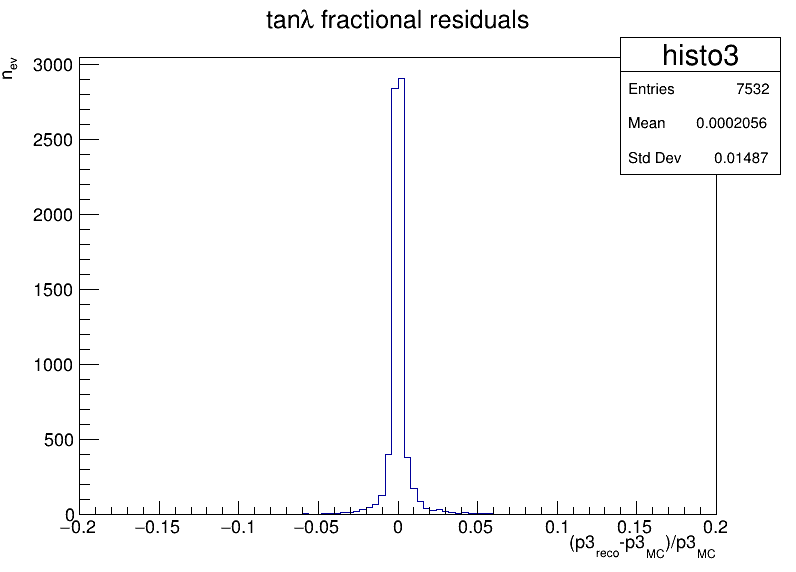

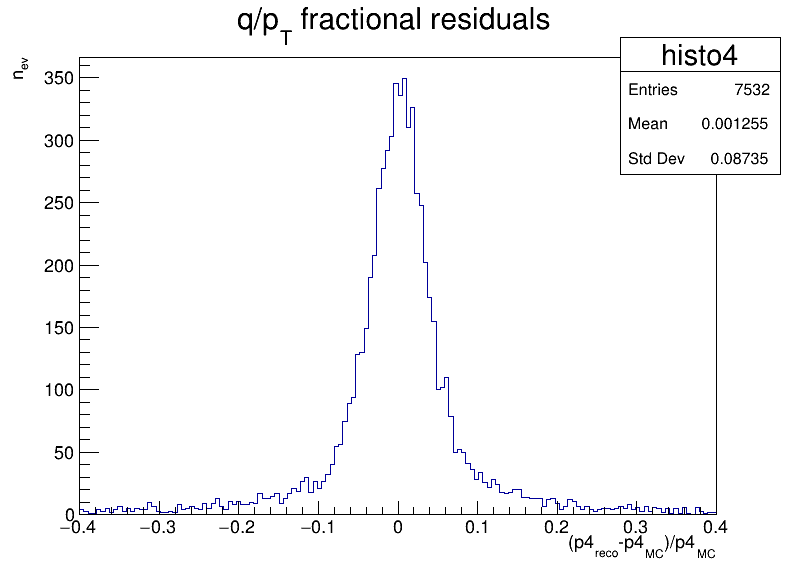

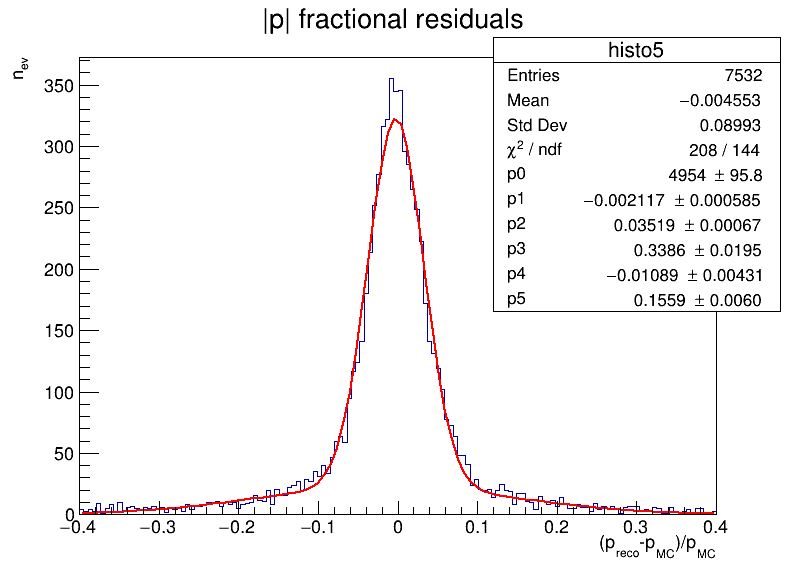

In [5]:
gStyle.SetOptFit(1)
gStyle.SetOptStat(1)

c0 = ROOT.TCanvas("myCanvasName0","The Canvas Title0",800,600)
instruction = "(p0In-p0MC)>>histo0"+spread_0
tree.Draw(instruction,"isOK")
histo0 = ROOT.gDirectory.Get("histo0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
c0.Draw()
save=folder+"Kalman_p0_Resid"+".png"
c0.Print(save)

c1 = ROOT.TCanvas("myCanvasName1","The Canvas Title1",800,600)
instruction = "(p1In-p1MC)>>histo1"+spread_1
tree.Draw(instruction,"isOK")
histo1 = ROOT.gDirectory.Get("histo1")
histo1.SetTitle("z residuals;p_{reco}-p_{MC};n_{ev}")
c1.Draw()
save=folder+"Kalman_p1_Resid"+".png"
c1.Print(save)

c2 = ROOT.TCanvas("myCanvasName2","The Canvas Title2",800,600)
instruction = "Res2MC>>histo2"+spread_2
tree.Draw(instruction,"isOK")
histo2 = ROOT.gDirectory.Get("histo2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/p2_{MC};n_{ev}")
c2.Draw()
save=folder+"Kalman_p2_Resid"+".png"
c2.Print(save)

c3 = ROOT.TCanvas("myCanvasName3","The Canvas Title3",800,600)
instruction = "Res3MC>>histo3"+spread_3
tree.Draw(instruction,"isOK")
histo3 = ROOT.gDirectory.Get("histo3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/p3_{MC};n_{ev}")
c3.Draw()
save=folder+"Kalman_p3_Resid"+".png"
c3.Print(save)

c4 = ROOT.TCanvas("myCanvasName4","The Canvas Title4",800,600)
instruction = "Res4MC>>histo4"+spread_4
tree.Draw(instruction,"isOK")
histo4 = ROOT.gDirectory.Get("histo4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/p4_{MC};n_{ev}")
c4.Draw()
save=folder+"Kalman_p4_Resid"+".png"
c4.Print(save)


cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
instruction = "RespMC>>histo5"+spread_p
tree.Draw(instruction,"isOK")
histo5 = ROOT.gDirectory.Get("histo5")
histo5.SetTitle("|p| fractional residuals;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
Formula = "0.39894228040143*"+str(histo5.GetBinWidth(0))+"*([0]/[2])*(exp(-0.5*((x-[1])/[2])^2)+[3]*exp(-0.5*((x-([1]+[4]))/[5])^2)*([2]/[5]))"
double_gauss0 = ROOT.TF1("double_gauss0",Formula,-0.4,0.4)
double_gauss0.SetParameters(histo5.GetEntries(),histo5.GetMean(),histo5.GetRMS(),0.5,histo5.GetRMS(),histo5.GetRMS())
double_gauss0.SetParLimits(2, 0, 1)
histo5.Fit("double_gauss0")
cp.Draw()
save=folder+"Kalman_p_Resid"+".png"
cp.Print(save)

In [ ]:

cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
instruction = "RespMC:LArm>>histo5"
tree.Draw(instruction,"isOK&&LArm>50","prof")
histo5 = ROOT.gDirectory.Get("histo5")
histo5.SetTitle("|p| fractional residuals;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
cp.Draw()
save=folder+"Kalman_p_Resid"+".png"
#cp.Print(save)

entry number:  2
[42.832000732421875, -5.437872374614017e-13, -142.78268432617188] -0.9308227896690369 2.4524754353953457
[41.836002349853516, -6.198597191087174e-12, -144.85020446777344] -0.9545965194702148 4.958344567962781
[40.84000015258789, 1.993294418412006e-12, -146.9689178466797] -0.9801450371742249 7.526640405533076
[39.84400177001953, 2.546629573885184e-12, -149.1472625732422] -1.007664680480957 10.166616043664815
[38.847999572753906, 8.921752225887758e-13, -151.3958282470703] -1.0375012159347534 12.89166644378227
[37.85200119018555, 9.364731212713195e-12, -153.724609375] -1.0699989795684814 15.714443909517747
[36.85599899291992, -3.5726976932437537e-12, -156.15603637695312] -1.1057401895523071 18.66160901440396
[35.86000061035156, -7.177369809596712e-12, -158.71485900878906] -1.1454060077667236 21.76302433095883
[34.8640022277832, -9.234168985017277e-12, -161.4358673095703] -1.1899566650390625 25.061036273744172
[33.86800003051758, 2.5199842212941803e-12, -164.37298583984375

Warning in <TROOT::Append>: Replacing existing TH1: hdist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamep


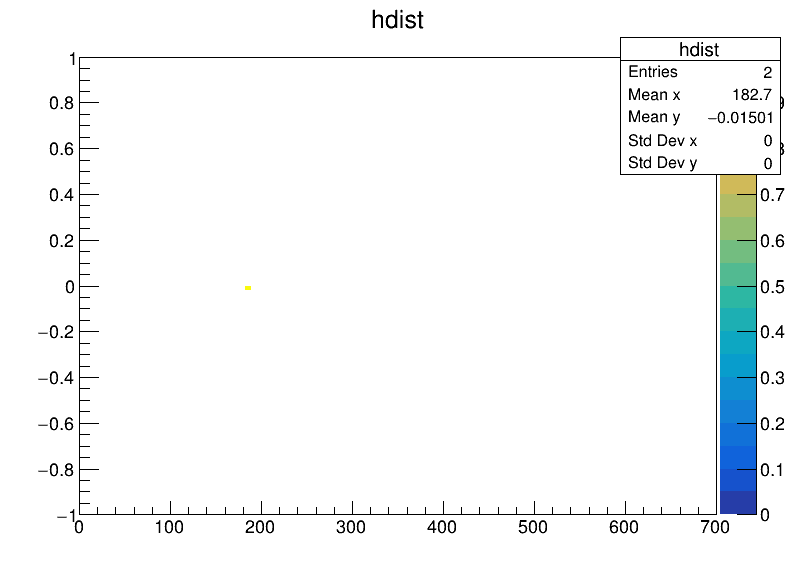

In [ ]:
hdist = ROOT.TH2D("hdist","hdist",100,0,700,100,-1,1)

for iev in range(tree.GetEntries()):
    tree.GetEntry(iev)
    print("entry number: ",str(iev))
    if (tree.part.fStatusMaskIn[1]!=31 or tree.part.fParamMC.size()==0): continue

    xyz_st = [tree.part.fParamMC[1].GetX(),tree.part.fParamMC[1].GetParameter()[0],tree.part.fParamMC[1].GetParameter()[1]]
    alpha_st = tree.part.fParamMC[1].GetAlpha()
    xyz_gl_st = [xyz_st[0]*np.cos(alpha_st)-xyz_st[1]*np.sin(alpha_st), xyz_st[0]*np.sin(alpha_st)+xyz_st[1]*np.cos(alpha_st), xyz_st[2]]
    x_g = xyz_gl_st[0]
    y_g = xyz_gl_st[1]
    length=0

    

    for i in range(2,tree.part.fParamMC.size()):
        xyz = [tree.part.fParamMC[i].GetX(),tree.part.fParamMC[i].GetParameter()[0],tree.part.fParamMC[i].GetParameter()[1]]
        alpha = tree.part.fParamMC[i].GetAlpha()
        xyz_gl = [xyz[0]*np.cos(alpha)-xyz[1]*np.sin(alpha), xyz[0]*np.sin(alpha)+xyz[1]*np.cos(alpha), xyz[2]]
        d = np.sqrt(np.square(xyz_gl[0]-xyz_gl_st[0])+np.square(xyz_gl[1]-xyz_gl_st[1])+np.square(xyz_gl[2]-xyz_gl_st[2]))
        length=length+d
        print(xyz,alpha,length)
        if(np.abs(xyz[0])==250 or tree.part.fLoop[i]==1): break
        xyz_gl_st=xyz_gl
        alpha_st=alpha
    
    res=(tree.part.fParamMC[1].GetP()-tree.part.fParamIn[1].GetP())/tree.part.fParamMC[1].GetP()
    hdist.Fill(length,res)

cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
hdist.Draw("COLZ")
cp.Draw()

        
        

# Seed Residuals

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Helix_p0_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Helix_p1_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/Helix_p2_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h3
Info in <TCanvas::Print>: png file /home/fede

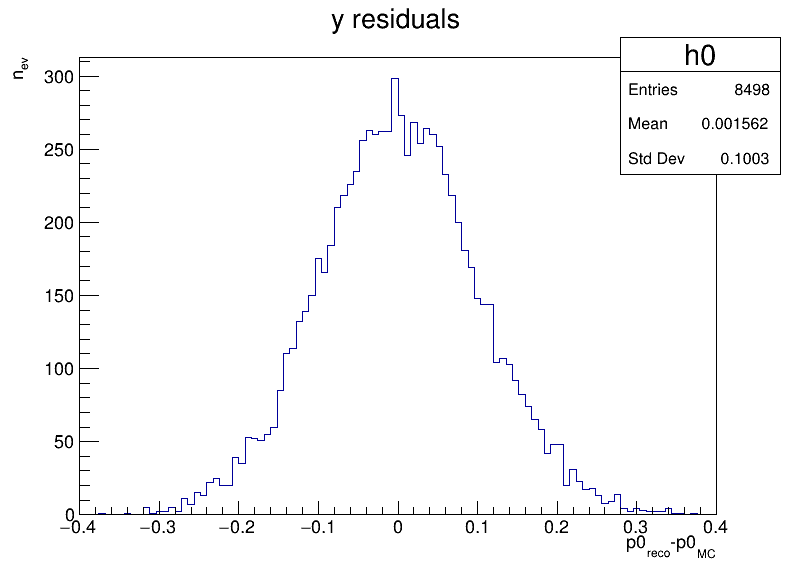

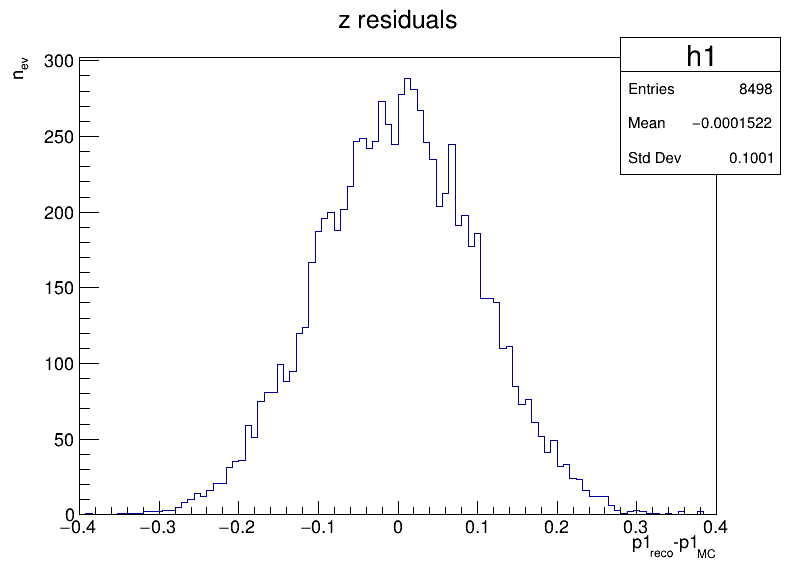

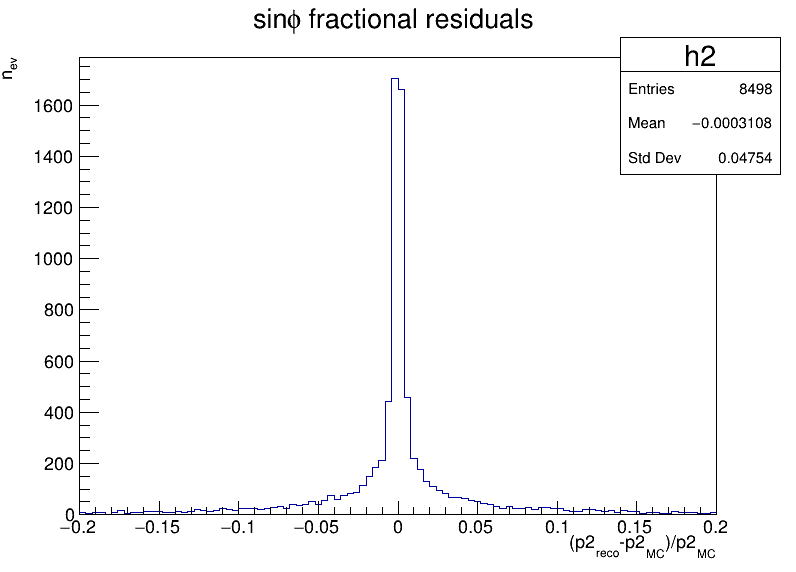

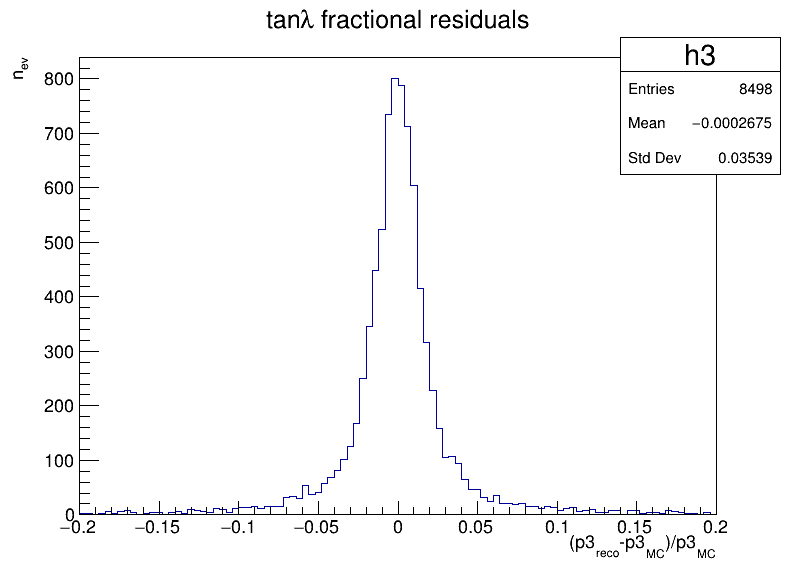

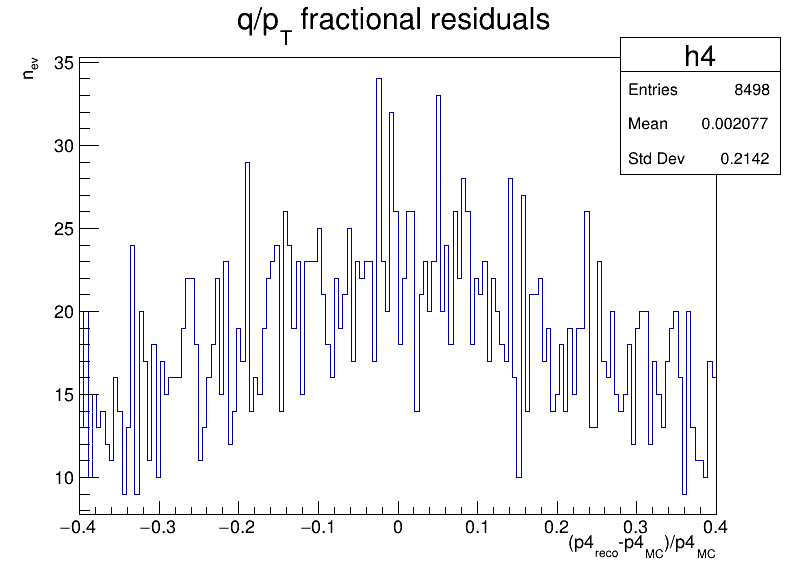

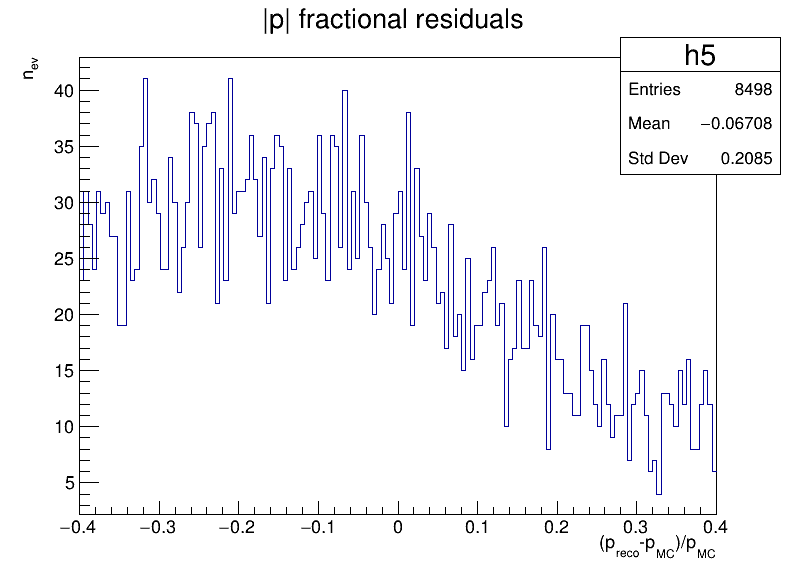

In [ ]:
h0 = ROOT.TCanvas("h0","h0",800,600)
instruction = "p0Seed-p0MC>>h0"+spread_0
treeSeed.Draw(instruction)
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
h0.Draw()
save=folder+"Helix_p0_Resid"+".png"
h0.Print(save)

h1 = ROOT.TCanvas("h1","h1",800,600)
instruction = "p1Seed-p1MC>>h1"+spread_1
treeSeed.Draw(instruction)
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
h1.Draw()
save=folder+"Helix_p1_Resid"+".png"
h1.Print(save)

h2 = ROOT.TCanvas("h2","h2",800,600)
instruction = "Res2MC>>h2"+spread_2
treeSeed.Draw(instruction)
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/p2_{MC};n_{ev}")
h2.Draw()
save=folder+"Helix_p2_Resid"+".png"
h2.Print(save)

h3 = ROOT.TCanvas("h3","h3",800,600)
instruction = "Res3MC>>h3"+spread_3
treeSeed.Draw(instruction)
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/p3_{MC};n_{ev}")
h3.Draw()
save=folder+"Helix_p3_Resid"+".png"
h3.Print(save)

h4 = ROOT.TCanvas("h4","h4",800,600)
instruction = "Res4MC>>h4"+spread_4
treeSeed.Draw(instruction)
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/p4_{MC};n_{ev}")
h4.Draw()
save=folder+"Helix_p4_Resid"+".png"
h4.Print(save)

cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
instruction = "RespMC>>h5"+spread_p
treeSeed.Draw(instruction)
histo5 = ROOT.gDirectory.Get("h5")
histo5.SetTitle("|p| fractional residuals;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
cp.Draw()
save=folder+"Helix_p_Resid"+".png"
cp.Print(save)

# Checking the simulation status

Warning in <TROOT::Append>: Replacing existing TH1: hstatus (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cstatus
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt20/MC_01smear_Eloss_MS_Seed_Eloss_MS_Kalman_Eloss_MS/status.png has been created


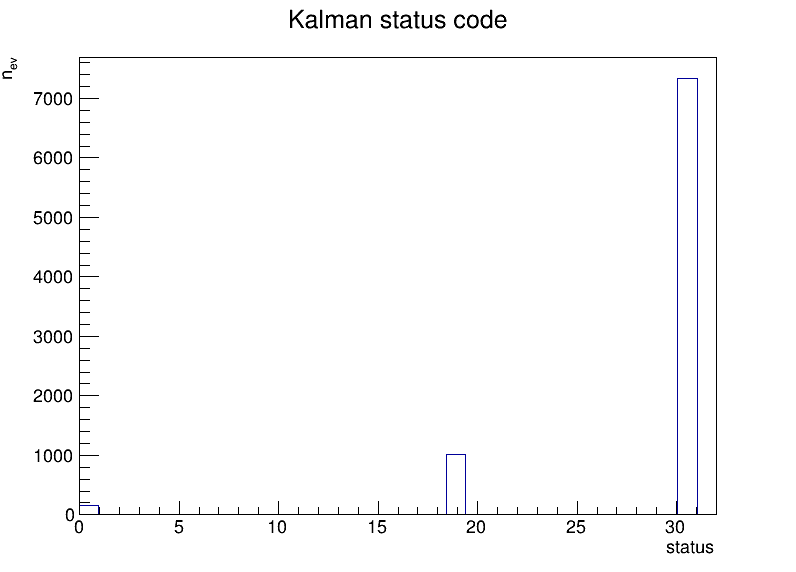

In [ ]:
hstatus   = ROOT.TH1D( 'hstatus', 'status', 33, 0, 32 )

for iev in range(tree.GetEntries()):
    tree.GetEntry(iev)
    size = tree.part.fStatusMaskIn.size()
    status=0
    for i in range(size):
        status = tree.part.fStatusMaskIn[size-i-1]
        if(i!=0 and status!=31):
            #print(status)
            break
    if(size!=0): hstatus.Fill(status) 
        

gStyle.SetOptStat(0)
cstatus = ROOT.TCanvas("cstatus","cstatus",800,600)
hstatus.SetTitle("Kalman status code;status;n_{ev}")
hstatus.Draw()
cstatus.Draw()
save=folder+"status"+".png"
cstatus.Print(save)